In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv("C:\\Users\\MOEED\\Desktop\\Knowledge Streams\\Machine Learning\Mini Project\Project ll.csv")
df.head()

,Product ID,image_link
0,1,https://cdn.shopify.com/s/files/1/0464/1731/39...
1,2,https://cdn.shopify.com/s/files/1/0464/1731/39...
2,3,https://cdn.shopify.com/s/files/1/0464/1731/39...
3,4,https://cdn.shopify.com/s/files/1/0464/1731/39...
4,5,https://cdn.shopify.com/s/files/1/0464/1731/39...


In [9]:
df.shape

(2074, 2)

In [13]:
pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/e4/14/d795bb156f8cc10eb1dcfe1332b7dbb8405b634688980aa9be8f885cc888/tensorflow-2.16.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.16.1 from https://files.pythonhosted.org/packages/e0/36/6278e4e7e69a90c00e0f82944d8f2713dd85a69d1add455d9e50446837ab/tensorflow_intel-2.16.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7b4557eb792fbcf0c653af6076b81e5941d36ec61f7ce6028/astunparse-1.6.3-py2.py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/bf/45/c961e3cb6ddad76b3

In [15]:
import os
import requests

def download_images(dataframe, image_column, save_directory):

    # Create the directory if it does not exist
    if not os.path.exists(save_directory):
        os.makedirs(save_directory)

    # Iterate over each row in the DataFrame
    for index, row in dataframe.iterrows():
        # Get the image URL from the specified column
        image_url = row[image_column]

        # Extract the filename from the URL
        filename = os.path.join(save_directory, f"image_{row['Product ID']}.jpg")

        # Download the image
        response = requests.get(image_url)

        # Check if the request was successful
        if response.status_code == 200:
            # Save the image to the specified directory
            with open(filename, 'wb') as f:
                f.write(response.content)
            print(f"Image {row['Product ID']} downloaded successfully.")
        else:
            print(f"Failed to download image {row['Product ID']}. Status code: {response.status_code}")


In [11]:
download_images(df, 'image_link', 'Datasets/images')

Image 1 downloaded successfully.
Image 2 downloaded successfully.
Image 3 downloaded successfully.
Image 4 downloaded successfully.
Image 5 downloaded successfully.
Image 6 downloaded successfully.
Image 7 downloaded successfully.
Image 8 downloaded successfully.
Image 9 downloaded successfully.
Image 10 downloaded successfully.
Image 11 downloaded successfully.
Image 12 downloaded successfully.
Image 13 downloaded successfully.
Image 14 downloaded successfully.
Image 15 downloaded successfully.
Image 16 downloaded successfully.
Image 17 downloaded successfully.
Image 18 downloaded successfully.
Image 19 downloaded successfully.
Image 20 downloaded successfully.
Image 21 downloaded successfully.
Image 22 downloaded successfully.
Image 23 downloaded successfully.
Image 24 downloaded successfully.
Image 25 downloaded successfully.
Image 26 downloaded successfully.
Image 27 downloaded successfully.
Image 28 downloaded successfully.
Image 29 downloaded successfully.
Image 30 downloaded suc

KeyboardInterrupt: 

In [16]:
import requests
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from PIL import Image
from io import BytesIO

# Function to preprocess image from URL
def preprocess_image_from_url(img_url):
    try:
        response = requests.get(img_url)
        img = Image.open(BytesIO(response.content))
        img = img.resize((224, 224))  # Resize the image to (224, 224)
        img_array = np.array(img)
        img_array = img_array.astype('float32') / 255  # Normalize pixel values
        img_array = np.expand_dims(img_array, axis=0)
        return img_array
    except Exception as e:
        print(f"Error processing image from URL {img_url}: {e}")
        return None

# Load pre-trained ResNet50 model
base_model = ResNet50(weights='imagenet')
# Remove the classification head
model = Model(inputs=base_model.input, outputs=base_model.get_layer('avg_pool').output)

# Function to extract features from images
def extract_features(image_urls):
    features = []
    for img_url in image_urls:
        img_array = preprocess_image_from_url(img_url)
        if img_array is not None:
            feature = model.predict(img_array)
            features.append(feature.flatten())
    return np.array(features)

# Function to recommend products using nearest neighbors
def recommend_products(query_image_url, product_image_urls, product_ids, k=5):
    # Extract features from the query image
    query_feature = extract_features([query_image_url])

    # Extract features from product images
    product_features = extract_features(product_image_urls)

    if len(product_features) == 0:
        return []

    # Standardize features
    scaler = StandardScaler()
    product_features_scaled = scaler.fit_transform(product_features)
    query_feature_scaled = scaler.transform(query_feature)

    # Fit nearest neighbors model
    nn_model = NearestNeighbors(n_neighbors=k)
    nn_model.fit(product_features_scaled)

    # Find nearest neighbors
    distances, indices = nn_model.kneighbors(query_feature_scaled)

    # Recommend products
    recommended_products = [(product_ids[i], distances[0][j]) for j, i in enumerate(indices[0])]

    return recommended_products

102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 22s 0us/step


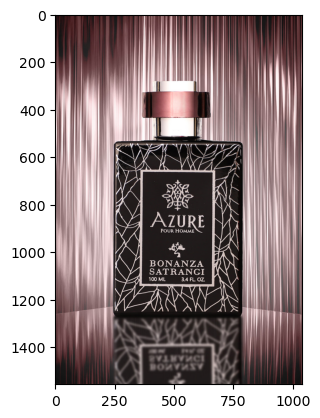

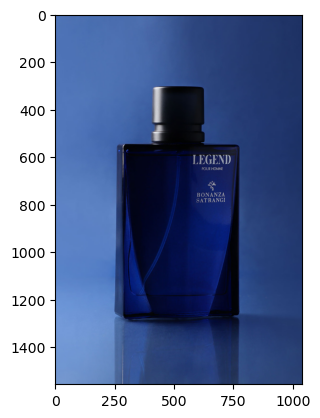

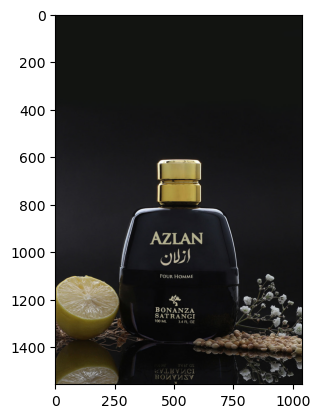

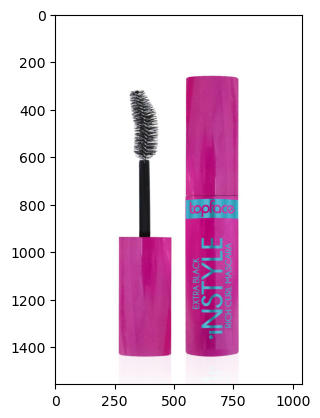

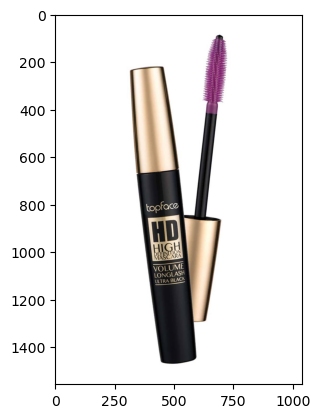

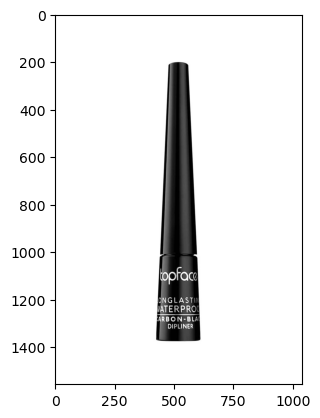

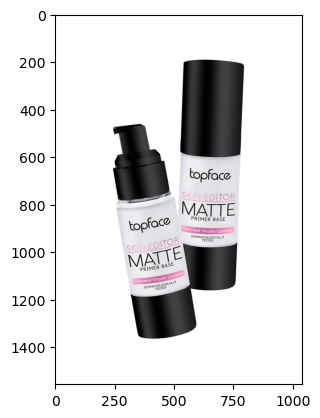

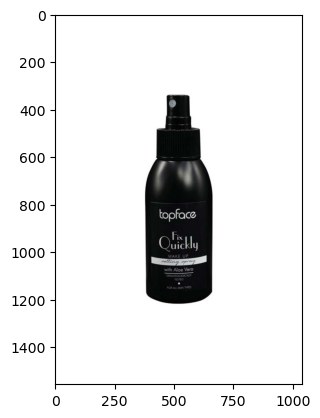

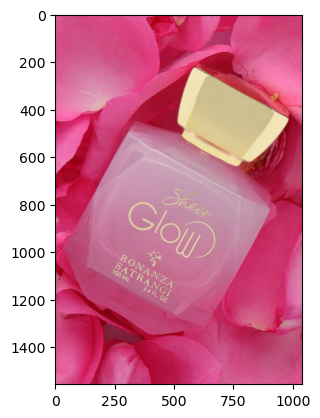

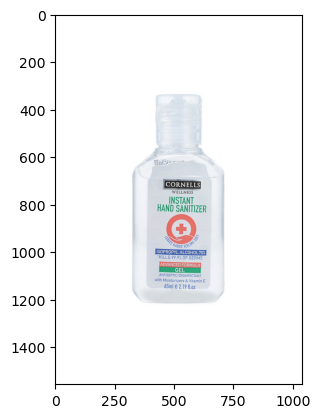

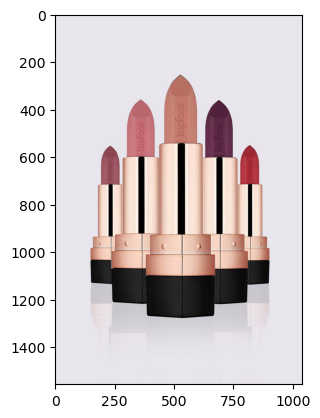

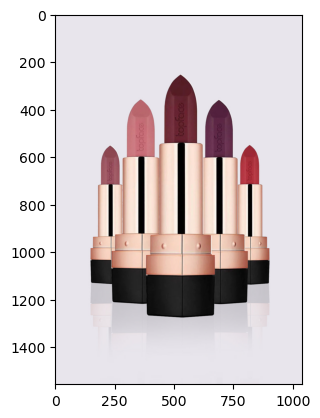

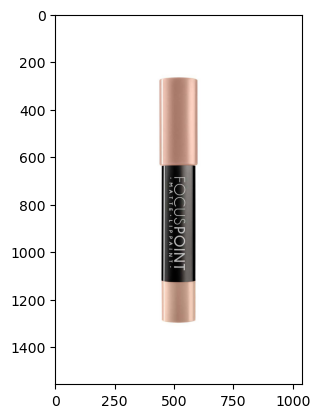

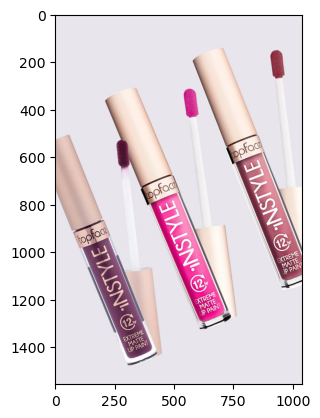

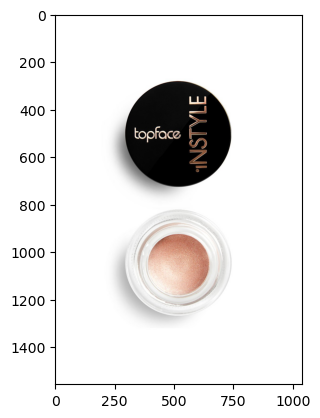

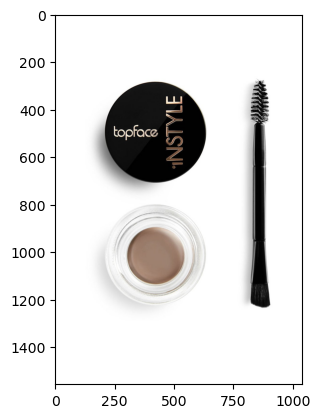

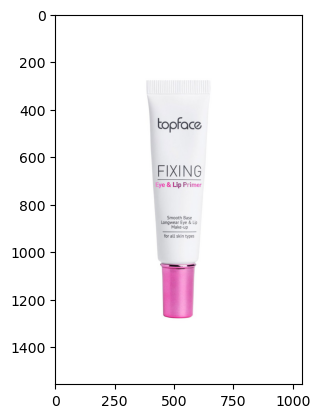

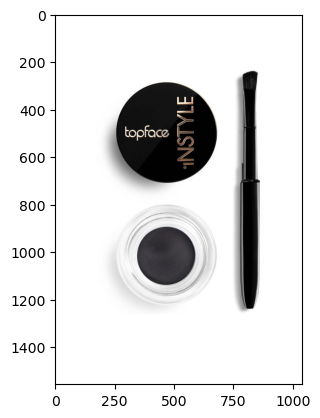

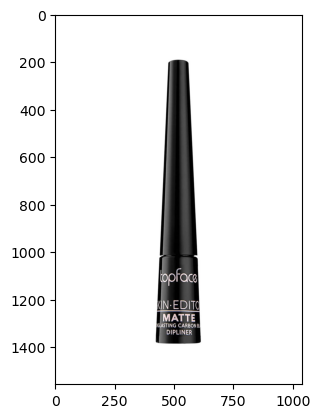

In [17]:
for i in range(1,20):
    img = f"Datasets/images/image_{i}.jpg"
    img2 = Image.open(img)
    plt.imshow(img2)
    plt.show()

In [18]:
import os
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from PIL import Image

# Function to preprocess image from file path
def preprocess_image_from_path(img_path):
    try:
        img = Image.open(img_path)
        img = img.resize((224, 224))  # Resize the image to (224, 224)

        # Convert RGBA to RGB if the image has an alpha channel
        if img.mode == 'RGBA':
            img = img.convert('RGB')

        img_array = np.array(img)
        print("Image array shape:", img_array.shape)  # Print image array shape
        print("Image array data type:", img_array.dtype)  # Print image array data type

        img_array = img_array.astype('float32') / 255  # Normalize pixel values
        img_array = np.expand_dims(img_array, axis=0)
        return img_array
    except Exception as e:
        print(f"Error processing image from path {img_path}: {e}")
        return None



# Load pre-trained ResNet50 model
base_model = ResNet50(weights='imagenet')
# Remove the classification head
model = Model(inputs=base_model.input, outputs=base_model.get_layer('avg_pool').output)

# Function to extract features from images
def extract_features(image_paths):
    features = []
    for img_path in image_paths:
        img_array = preprocess_image_from_path(img_path)
        if img_array is not None:
            feature = model.predict(img_array)
            features.append(feature.flatten())
    return np.array(features)

# Function to recommend products using nearest neighbors
def recommend_products(query_image_path, product_image_paths, k=5):
    # Extract features from the query image
    query_feature = extract_features([query_image_path])

    # Extract features from product images
    product_features = extract_features(product_image_paths)

    if len(product_features) == 0:
        return [], []

    # Standardize features
    scaler = StandardScaler()
    product_features_scaled = scaler.fit_transform(product_features)
    query_feature_scaled = scaler.transform(query_feature)

    # Fit nearest neighbors model
    nn_model = NearestNeighbors(n_neighbors=k)
    nn_model.fit(product_features_scaled)

    # Find nearest neighbors
    distances, indices = nn_model.kneighbors(query_feature_scaled)

    # Recommend products (returning image paths and images)
    recommended_product_paths = [product_image_paths[i] for i in indices[0]]
    recommended_product_images = [Image.open(img_path) for img_path in recommended_product_paths]

    return recommended_product_paths, recommended_product_images


In [ ]:
import os
import matplotlib.pyplot as plt

# Example usage
query_image_path = 'C:\\Users\\MOEED\\Desktop\\Knowledge Streams\\Machine Learning\\images\\image_45.jpg'
product_image_folder_path = 'C:\\Users\\MOEED\\Desktop\\Knowledge Streams\\Machine Learning\\images'
product_image_paths = [os.path.join(product_image_folder_path, img) for img in os.listdir(product_image_folder_path)]

# Get recommended product paths and images
recommended_product_paths, recommended_product_images = recommend_products(query_image_path, product_image_paths)

# Display recommended product images
fig, axes = plt.subplots(1, len(recommended_product_images), figsize=(15, 5))
for ax, img, path in zip(axes, recommended_product_images, recommended_product_paths):
    ax.imshow(img)
    ax.set_title(path)
    ax.axis("off")

plt.show()

Image array shape: (224, 224, 3)
Image array data type: uint8
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 598ms/step
Image array shape: (224, 224, 3)
Image array data type: uint8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Image array shape: (224, 224, 3)
Image array data type: uint8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Image array shape: (224, 224, 3)
Image array data type: uint8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Image array shape: (224, 224, 3)
Image array data type: uint8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Image array shape: (224, 224, 3)
Image array data type: uint8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Image array shape: (224, 224, 3)
Image array data type: uint8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Image array shape: (224, 224, 3)
Image array data type: uint8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Image array shape: (224, 224, 3)
Image array data type: uint8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Image array shape: (224, 224, 3)
Image array data type: uint8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step